In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stats

# Section A: 20 MARKS

## 1. Answer the following questions based on the Indian Liver Patient dataset?



In [3]:
df=pd.read_csv("C:/Users/Anand/Desktop/Yash/indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### A. Check the summary for the numerical features (1 marks)

In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [20]:
df=pd.get_dummies(data=df,columns=['Gender'],drop_first=True)

In [23]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


### B. Visually represent the number of Patients with and Without liver disease? (2 marks)


In [1]:
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

NameError: name 'sns' is not defined


### C. Visually represent the number of Male and Female patients? (2 marks)

Number of patients that are male:  441
Number of patients that are female:  142


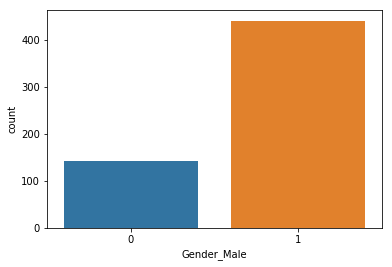

In [25]:
sns.countplot(data=df, x = 'Gender_Male', label='Count')

M, F = df['Gender_Male'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

## 2. Is there any relationship
### A. Between Age, Gender and Liver disease? Write down your observation? (2marks)


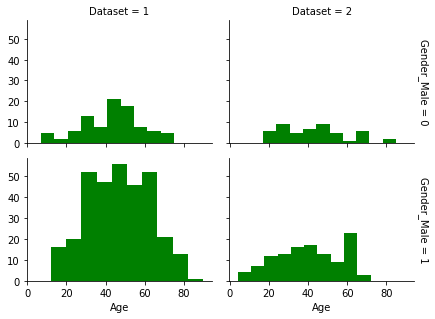

In [27]:
a = sns.FacetGrid(df, col="Dataset", row="Gender_Male", margin_titles=True)
a.map(plt.hist, "Age", color="green")
plt.subplots_adjust(top=0.7)
g.fig.suptitle('Disease by Gender and Age');

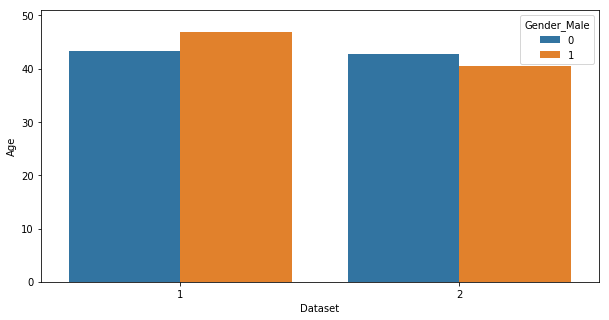

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Dataset',y='Age',hue='Gender_Male',errwidth=0.0)
plt.show()

- Age might be a factor for liver disease for both male and female genders

### B. Between Direct_Bilirubin and Total_Bilirubin for both the genders? (1 marks)


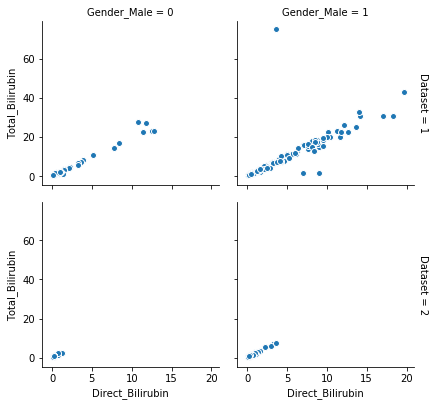

In [28]:
g = sns.FacetGrid(df, col="Gender_Male", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


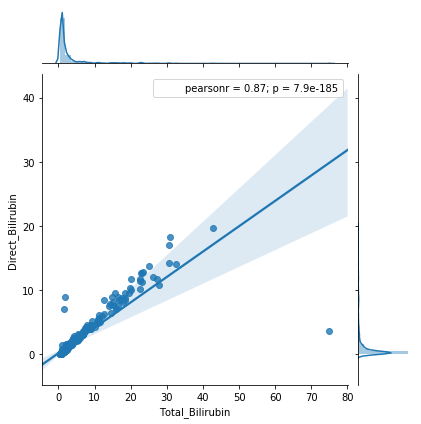

In [11]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=df, kind="reg")

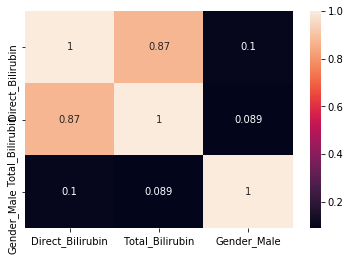

In [29]:

sns.heatmap(df[['Direct_Bilirubin','Total_Bilirubin','Gender_Male']].corr(),
           annot=True)
plt.show()

- There is direct relationship between Total_Bilirubin and Direct_Bilirubin. 


### C. Between Aspartate_Aminotransferase and Alamine_Aminotransferase with the Gender Column? (2 marks)

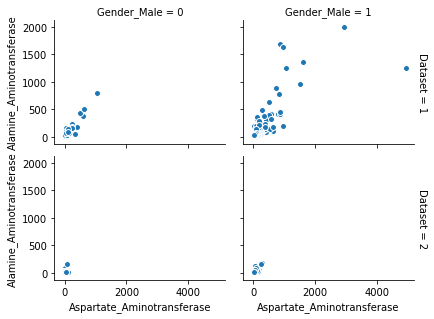

In [30]:
b= sns.FacetGrid(df, col="Gender_Male", row="Dataset", margin_titles=True)
b.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.7)

- There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. 

E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


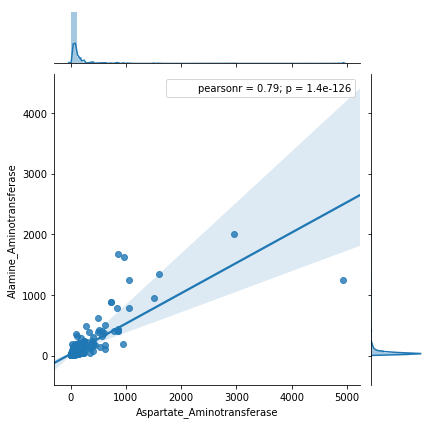

In [13]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df, kind="reg")

- linear relationship is there.

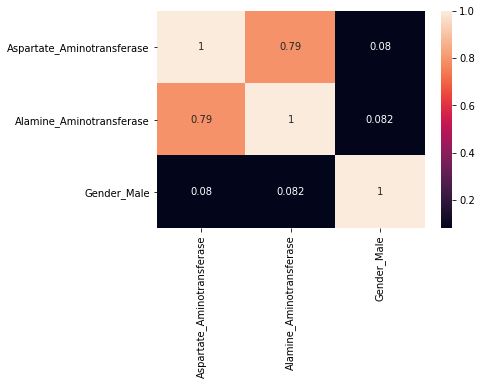

In [31]:
sns.heatmap(df[['Aspartate_Aminotransferase','Alamine_Aminotransferase','Gender_Male']].corr(),
           annot=True)
plt.show()

- There is a relationship 'Aspartate_Aminotransferase','Alamine_Aminotransferase','Gender'.


## 3. A. For the Dataset Image given below. Write code to remove Hyphen (-) and Change the datatype of the column as numeric? (2 Marks)

In [ ]:
x = df[df['population_male']!='-']
population_mean = x['population_mean'].astype(int).mean()
df['population_mean'] = df['population_mean'].replace('-',population_mean).astype(int)

### B)For the Dataset given below. Write code to Convert &#39;N&#39; Category as 0 and &#39;P&#39; category as 1 for the Shortlisted Column? (1 Mark)

In [ ]:
df["Shortlisted"]=df["Shortlisted"].replace({"N":0,"P":1})

### C)For the Dataset given below. Create a calculated field Male_Ratio which Calculates the ratio of Male Population to the total population? (2 Marks)

In [ ]:
df["Male_ratio"]=round((df["population_male"]/df["population_total"])*100,2)

## 4. Read the dataset(German Credit Data.csv) answer the questions below



In [33]:
df1=pd.read_csv("C:/Users/Anand/Desktop/Yash/German+Credit+Data.csv")
df1.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


### A. Draw the Count Plot for &#39;Checkin_acc&#39; Column? (1 Marks)

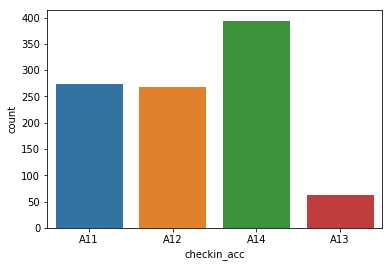

In [37]:
sns.countplot(data=df1, x = 'checkin_acc', label='Count')    

### B. How does the distribution of the &#39;Age&#39; column look like and perform the test of Normality? (2 Marks)


E:\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


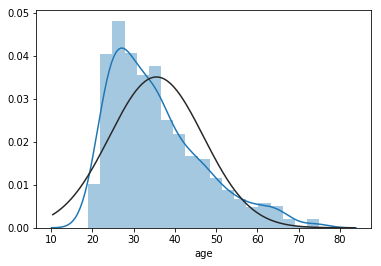

In [43]:
sns.distplot(df1['age'],fit=stats.norm)

- Age aolumn in our data set is not normaly distributed as we can observe from the distribution plot.

### C. How do you handle object variables? Write down the code for encoding? (2 Marks)

In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
amount               1000 non-null int64
savings_acc          1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
residing_since       1000 non-null int64
age                  1000 non-null int64
inst_plans           1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
status               1000 non-null int64
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [119]:
categorical_cols = df1.select_dtypes(include="object").columns

print('There are',len(categorical_cols),'categorical columns')

There are 7 categorical columns


In [120]:
categorical_cols = df1.select_dtypes(include="object")
categorical_cols

,checkin_acc,credit_history,savings_acc,present_emp_since,personal_status,inst_plans,job
0,A11,A34,A65,A75,A93,A143,A173
1,A12,A32,A61,A73,A92,A143,A173
2,A14,A34,A61,A74,A93,A143,A172
3,A11,A32,A61,A74,A93,A143,A173
4,A11,A33,A61,A73,A93,A143,A173
5,A14,A32,A65,A73,A93,A143,A172
6,A14,A32,A63,A75,A93,A143,A173
7,A12,A32,A61,A73,A93,A143,A174
8,A14,A32,A64,A74,A91,A143,A172
9,A12,A34,A61,A71,A94,A143,A174


In [ ]:
df1=pd.get_dummies(data=df1,columns=['checkin_acc','credit_history','savings_acc','present_emp_since','personal_status','inst_plan','job'],drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = list(df1.select_dtypes(include='object').columns)

le = LabelEncoder()
df1[categorical_variables] = df1[categorical_variables].apply(lambda col: le.fit_transform(col))

df1.head()

We can add dummy variables,we can do onehot encoding ,label encoding to handle object variable.

# Section B: 20 MARKS

## 5. Read the dataset (Vehicle production.txt) and answer the questions below Millions of units at an annual rate - Not seasonally adjusted

### Variables/Columns: Year, Month of Year, Month of series, total production, auto production, truck production


In [38]:
df2=pd.read_csv('C:/Users/Anand/Desktop/Yash/Vehicle production.txt',sep='   ',names=['Year','MonthofYear','MonthofSeries','TotalProduction','AutoProduction','TruckProduction'])
df2.head()

E:\Python\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Year,MonthofYear,MonthofSeries,TotalProduction,AutoProduction,TruckProduction
0,1965,1,1,11.660,9.922,1.738
1,1965,2,2,10.832,9.254,1.578
2,1965,3,3,13.623,11.551,2.073
3,1965,4,4,12.254,10.343,1.911
4,1965,5,5,11.889,10.046,1.843


### 5.A) Check for outliers and how to treat them? (5 Mark)


In [47]:
df2.shape

(462, 6)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 6 columns):
Year               462 non-null int64
MonthofYear        462 non-null int64
MonthofSeries      462 non-null int64
TotalProduction    462 non-null float64
AutoProduction     462 non-null float64
TruckProduction    462 non-null float64
dtypes: float64(3), int64(3)
memory usage: 21.7 KB


In [50]:
df2['Date']=pd.to_datetime(df2.Year.astype(str) + '/' + df2.MonthofYear.astype(str) + '/01')
df2

,Year,MonthofYear,MonthofSeries,TotalProduction,AutoProduction,TruckProduction,Date
0,1965,1,1,11.660,9.922,1.738,1965-01-01
1,1965,2,2,10.832,9.254,1.578,1965-02-01
2,1965,3,3,13.623,11.551,2.073,1965-03-01
3,1965,4,4,12.254,10.343,1.911,1965-04-01
4,1965,5,5,11.889,10.046,1.843,1965-05-01
5,1965,6,6,12.834,10.789,2.045,1965-06-01
6,1965,7,7,10.376,8.881,1.495,1965-07-01
7,1965,8,8,5.136,3.772,1.364,1965-08-01
8,1965,9,9,7.640,5.898,1.742,1965-09-01
9,1965,10,10,12.037,10.186,1.851,1965-10-01


In [51]:
df2.dtypes

Year                        int64
MonthofYear                 int64
MonthofSeries               int64
TotalProduction           float64
AutoProduction            float64
TruckProduction           float64
Date               datetime64[ns]
dtype: object

In [53]:
df2.drop(['Year','MonthofYear'],axis=1,inplace=True)

In [54]:
df2.describe()

,MonthofSeries,TotalProduction,AutoProduction,TruckProduction
count,462.000000,462.000000,462.000000,462.000000
mean,231.500000,10.804775,7.058478,3.746323
std,133.512172,2.372110,1.925841,1.923182
min,1.000000,2.561000,1.765000,0.796000
25%,116.250000,9.407500,5.640750,2.126500
50%,231.500000,11.229500,6.830000,3.288000
75%,346.750000,12.512500,8.370250,4.761500
max,462.000000,15.755000,11.551000,9.099000


In [55]:
df2.isnull().sum().sum()

0

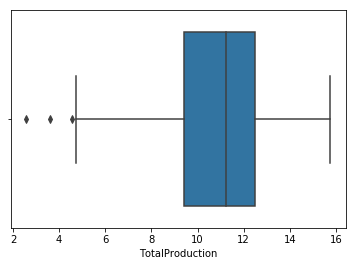

In [56]:
sns.boxplot(df2.TotalProduction)

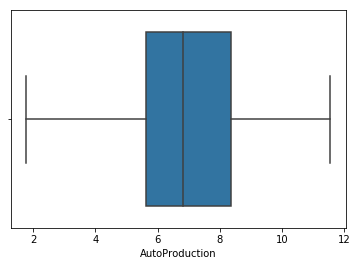

In [58]:
sns.boxplot(df2.AutoProduction)

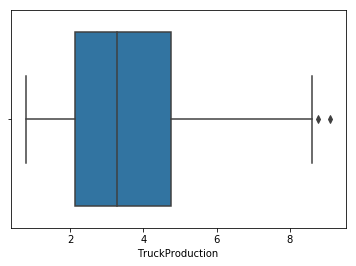

In [59]:
sns.boxplot(df2.TruckProduction)

- there are outliers for totalproduction and TruckProduction columns

### Using IQR method to remove outliers

In [61]:
Q1=df2['TotalProduction'].quantile(0.25)
Q3=df2['TotalProduction'].quantile(0.75)
IQR=Q3-Q1
df2 = df2[~((df2['TotalProduction']<(Q1-1.5*IQR))|(df2['TotalProduction']>(Q3+1.5*IQR)))]

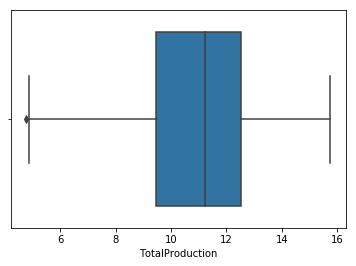

In [62]:
sns.boxplot(df2.TotalProduction)

In [63]:
df2.shape

(459, 5)

In [64]:
Q1=df2['TruckProduction'].quantile(0.25)
Q3=df2['TruckProduction'].quantile(0.75)
IQR=Q3-Q1
df2 = df2[~((df2['TruckProduction']<(Q1-1.5*IQR))|(df2['TruckProduction']>(Q3+1.5*IQR)))]

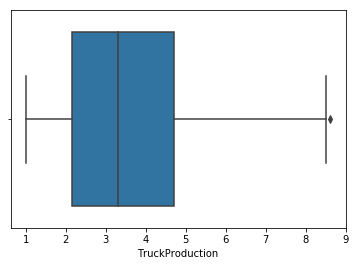

In [65]:
sns.boxplot(df2.TruckProduction)

In [66]:
df2.shape

(457, 5)

- Not much data is lost so we can remove these outliers.


### 5.B) Which month of the year has the highest Auto production and Truck production? (5 Marks)

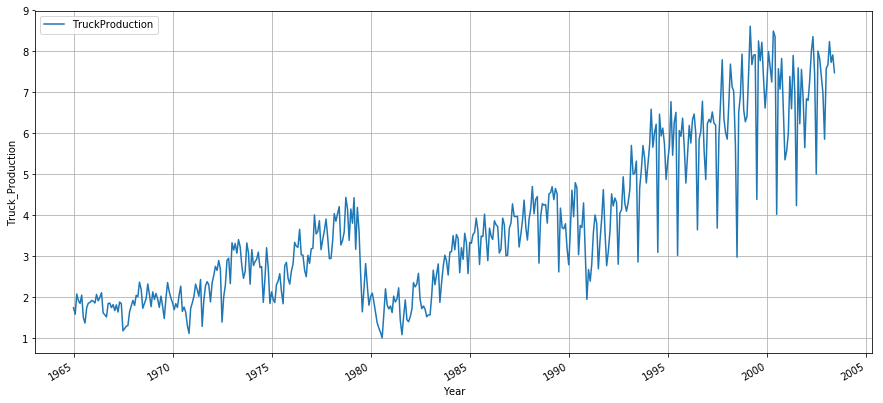

In [68]:
df2.plot(x='Date',y='TruckProduction',grid=True,figsize=(15,7))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Truck_Production')
plt.show()

In [69]:
df2[df2['TruckProduction']==df2['TruckProduction'].max()]['Date']

410   1999-03-01
Name: Date, dtype: datetime64[ns]

- So third month of the year 1999 has highest auto production

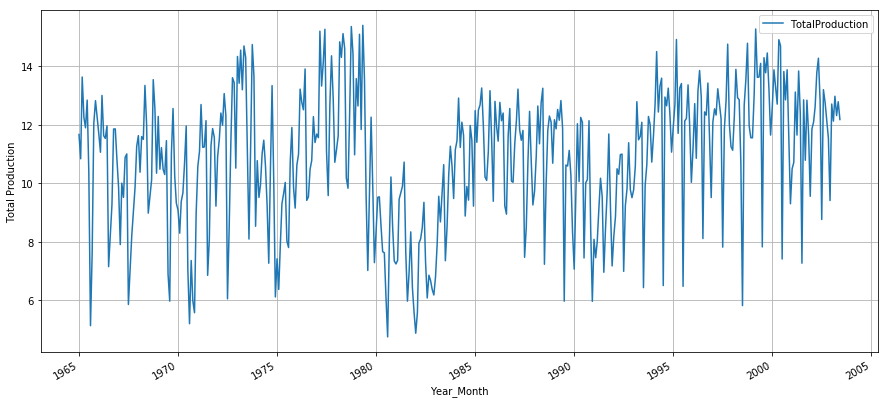

In [70]:
df2.plot(x='Date',y='TotalProduction',grid=True,figsize=(15,7))
plt.grid(True)
plt.xlabel('Year_Month')
plt.ylabel('Total Production')
plt.show()

In [71]:
df2[df2['TotalProduction']==df2['TotalProduction'].max()]['Date']

172   1979-05-01
Name: Date, dtype: datetime64[ns]

- We can see 5th month of year 1979 has the highest autoproduction.

### 6.A) Which player got the maximum premium (Price) on the base price and What is the average SOLD PRICE for each &#39;age&#39; category? (5 Marks)


In [73]:
df3=pd.read_csv("C:/Users/Anand/Desktop/Yash/IPL.csv")
df3.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [75]:
df3.describe()

,Sl.NO.,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,1.300000e+02
mean,65.500000,2.092308,2166.715385,66.530769,2508.738462,71.164385,76.076923,34.033846,0.315385,514.246154,...,111.053462,17.692308,475.523077,17.169231,23.110231,6.204462,17.382615,2009.092308,1.922308e+05,5.212231e+05
std,37.671829,0.576627,3305.646757,142.676855,3582.205625,25.898440,111.205070,26.751749,0.466466,615.226335,...,35.928907,23.828146,558.314049,21.816763,20.802057,4.941531,15.273422,1.377821,1.530973e+05,4.068074e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,2.000000e+04,2.000000e+04
25%,33.250000,2.000000,25.500000,0.000000,73.250000,65.650000,0.000000,0.000000,0.000000,39.000000,...,98.237500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000e+05,2.250000e+05
50%,65.500000,2.000000,542.500000,7.000000,835.000000,78.225000,18.500000,36.600000,0.000000,172.000000,...,118.510000,6.000000,297.000000,8.500000,24.785000,7.380000,19.935000,2008.000000,2.000000e+05,4.375000e+05
75%,97.750000,2.000000,3002.250000,47.500000,3523.500000,86.790000,106.000000,45.325000,1.000000,925.250000,...,129.102500,29.750000,689.250000,23.750000,35.580000,8.247500,26.212500,2011.000000,2.250000e+05,7.000000e+05
max,130.000000,3.000000,15470.000000,800.000000,18426.000000,116.660000,534.000000,150.000000,1.000000,2254.000000,...,235.490000,129.000000,1975.000000,83.000000,126.300000,38.110000,100.200000,2011.000000,1.350000e+06,1.800000e+06


In [76]:
df3.isnull().sum().sum()

0

In [77]:
df3['Premium']=df3['SOLD PRICE']-df3['BASE PRICE']

In [78]:
df3.loc[df3['Premium']==df3.Premium.max()]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,Premium
50,51,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,...,49,345,4,86.25,8.84,58.5,2011,150000,1800000,1650000


### 6.B) What are the outliers in Sold Price? Filter out the outliers and display the  Name of the player, Sold price and their Playing role and Who are the highest sold players? (5 Marks)

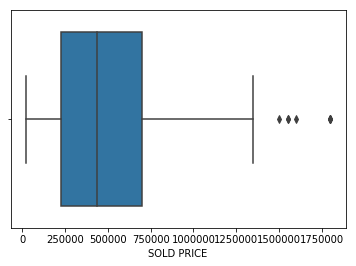

In [79]:
sns.boxplot(df3['SOLD PRICE'])

In [80]:
df3['SOLD PRICE'].describe()

count    1.300000e+02
mean     5.212231e+05
std      4.068074e+05
min      2.000000e+04
25%      2.250000e+05
50%      4.375000e+05
75%      7.000000e+05
max      1.800000e+06
Name: SOLD PRICE, dtype: float64

In [81]:
df3['SOLD PRICE'].mean()+(3*df3['SOLD PRICE'].std())

1741645.1311808582

In [82]:
df3[df3['SOLD PRICE']>1741645.3000000003]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,Premium
50,51,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,...,49,345,4,86.25,8.84,58.50,2011,150000,1800000,1650000
93,94,"Sehwag, V",2,IND,DD,Batsman,8178,40,8090,104.68,...,79,226,6,37.67,10.56,21.67,2011,400000,1800000,1400000
111,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.23,...,24,58,0,0.00,9.67,0.00,2011,400000,1800000,1400000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,67,569,23,24.74,7.02,21.13,2011,400000,1800000,1400000


In [83]:
df3[df3['SOLD PRICE']>1741645.3000000003]['PLAYER NAME']

50          Kohli, V
93         Sehwag, V
111    Tendulkar, SR
127     Yuvraj Singh
Name: PLAYER NAME, dtype: object

In [84]:
df3.loc[df3['SOLD PRICE']>1741645.3000000003,'SOLD PRICE']=1741645.4

- removing outliers

In [85]:
df3.loc[df3['SOLD PRICE']>1741645.3000000003,'SOLD PRICE']=1741645.4

In [86]:
df3.loc[df3['SOLD PRICE']==df3["SOLD PRICE"].max()]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,Premium
50,51,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,...,49,345,4,86.25,8.84,58.50,2011,150000,1741645.4,1650000
93,94,"Sehwag, V",2,IND,DD,Batsman,8178,40,8090,104.68,...,79,226,6,37.67,10.56,21.67,2011,400000,1741645.4,1400000
111,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.23,...,24,58,0,0.00,9.67,0.00,2011,400000,1741645.4,1400000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,67,569,23,24.74,7.02,21.13,2011,400000,1741645.4,1400000


In [87]:
df3[['PLAYER NAME','SOLD PRICE','PLAYING ROLE']][df3["SOLD PRICE"]>1741645]

,PLAYER NAME,SOLD PRICE,PLAYING ROLE
50,"Kohli, V",1741645.4,Batsman
93,"Sehwag, V",1741645.4,Batsman
111,"Tendulkar, SR",1741645.4,Batsman
127,Yuvraj Singh,1741645.4,Batsman


In [88]:
df3.sort_values(by=['SOLD PRICE','Premium'],ascending=False).head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,Premium
50,51,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,...,49,345,4,86.25,8.84,58.50,2011,150000,1741645.4,1650000
93,94,"Sehwag, V",2,IND,DD,Batsman,8178,40,8090,104.68,...,79,226,6,37.67,10.56,21.67,2011,400000,1741645.4,1400000
111,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.23,...,24,58,0,0.00,9.67,0.00,2011,400000,1741645.4,1400000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,67,569,23,24.74,7.02,21.13,2011,400000,1741645.4,1400000
113,114,"Tiwary, SS",1,IND,MI+,Batsman,0,0,49,87.50,...,32,0,0,0.00,0.00,0.00,2011,100000,1600000.0,1500000


- V.Kohli,V.Sehwag,S.Tendulkar,Yuvraj Singh and S.Tiwary are the hightest sold players in ipl

# Section C: 30 MARKS

## 7. Read the file &#39;pgaTourData.csv&#39; and solve the following:



In [72]:
df4=pd.read_csv('C:/Users/Anand/Desktop/Yash/PgaTourData.csv')
df4.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [89]:
df4.isna().sum()

Player Name              0
Rounds                 634
Fairway Percentage     634
Year                     0
Avg Distance           634
gir                    634
Average Putts          634
Average Scrambling     634
Average Score          634
Points                  16
Wins                  2019
Top 10                 854
Average SG Putts       634
Average SG Total       634
SG:OTT                 634
SG:APR                 634
SG:ARG                 634
Money                   12
dtype: int64

- we can see that top10 has 854 missing values and wins have 2019 missing values.

### A. Replace both the Nan values in &quot;Top 10&quot; and &quot;wins&quot; with 0 (2 marks)

In [90]:

df4['Top 10'].fillna(0, inplace=True)
df4['Wins'].fillna(0, inplace=True)

In [91]:
df4.isna().sum()

Player Name             0
Rounds                634
Fairway Percentage    634
Year                    0
Avg Distance          634
gir                   634
Average Putts         634
Average Scrambling    634
Average Score         634
Points                 16
Wins                    0
Top 10                  0
Average SG Putts      634
Average SG Total      634
SG:OTT                634
SG:APR                634
SG:ARG                634
Money                  12
dtype: int64

- Replacing the na with 0

### B. Drop the NaN values and change the data type of &#39;Wins’, ‘Top 10&#39; and &#39;Rounds&#39; to an integer type (2 marks)


In [92]:
df4.dropna(axis = 0, inplace=True) 

In [93]:
df4['Wins'] = df4['Wins'].astype(int)  
df4['Top 10'] = df4['Top 10'].astype(int)  
df4['Rounds'] = df4['Rounds'].astype(int)  

In [94]:
df4.isna().sum()

Player Name           0
Rounds                0
Fairway Percentage    0
Year                  0
Avg Distance          0
gir                   0
Average Putts         0
Average Scrambling    0
Average Score         0
Points                0
Wins                  0
Top 10                0
Average SG Putts      0
Average SG Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
Money                 0
dtype: int64

All missing values are replaced.


### C. Remove &#39;,&#39; from the column &#39;Points&#39; and convert it into an integer type (2 marks)


In [95]:
df4['Points'] = df4['Points'].apply(lambda x: x.replace(',','')).astype(int)
df4['Points'].head()

0     868
1    1006
2    1020
3     795
4     421
Name: Points, dtype: int32

- We can see that , is removed and it is in int.

### D. Remove &#39;,&#39; and &#39;$&#39; from the column &#39;Money&#39; and convert it into an integer type (2 marks)


In [96]:
df4['Money'] = df4['Money'].apply(lambda x: x.replace('$',''))
df4['Money'] = df4['Money'].apply(lambda x: x.replace(',','')).astype(int)
df4['Points'].head()

0     868
1    1006
2    1020
3     795
4     421
Name: Points, dtype: int32


### E. Make a distribution plot for all the features and provide insights on it (5 marks)


In [97]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 18 columns):
Player Name           1674 non-null object
Rounds                1674 non-null int32
Fairway Percentage    1674 non-null float64
Year                  1674 non-null int64
Avg Distance          1674 non-null float64
gir                   1674 non-null float64
Average Putts         1674 non-null float64
Average Scrambling    1674 non-null float64
Average Score         1674 non-null float64
Points                1674 non-null int32
Wins                  1674 non-null int32
Top 10                1674 non-null int32
Average SG Putts      1674 non-null float64
Average SG Total      1674 non-null float64
SG:OTT                1674 non-null float64
SG:APR                1674 non-null float64
SG:ARG                1674 non-null float64
Money                 1674 non-null int32
dtypes: float64(11), int32(5), int64(1), object(1)
memory usage: 215.8+ KB


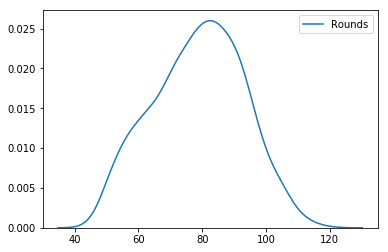

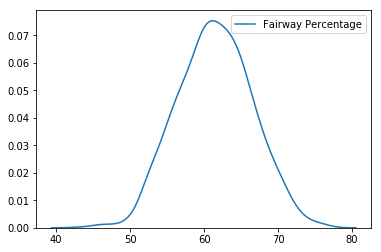

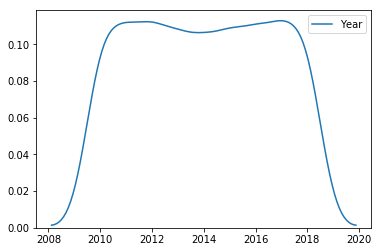

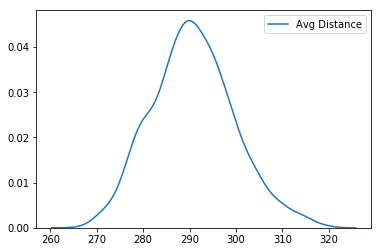

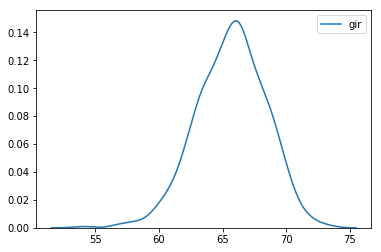

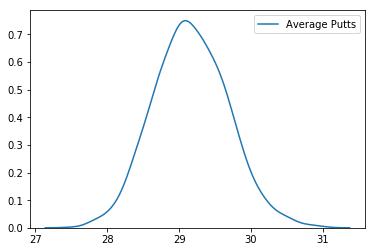

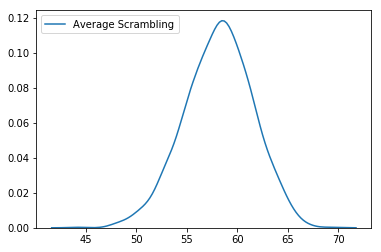

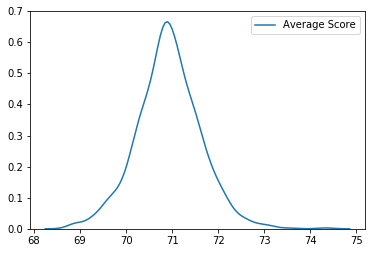

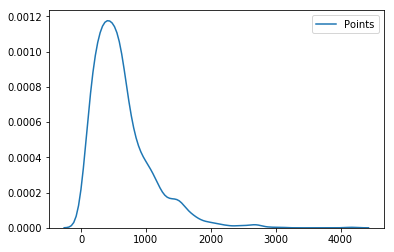

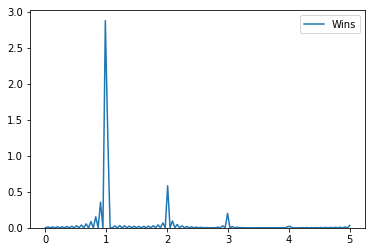

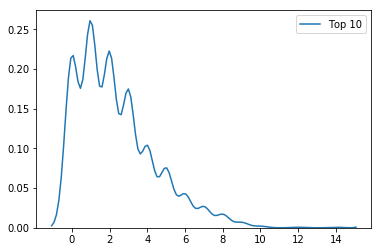

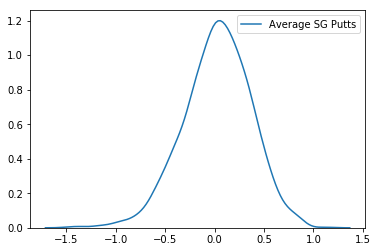

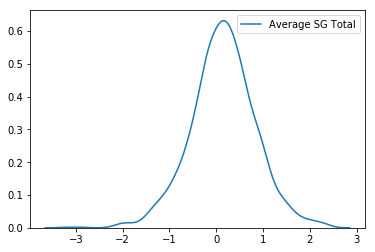

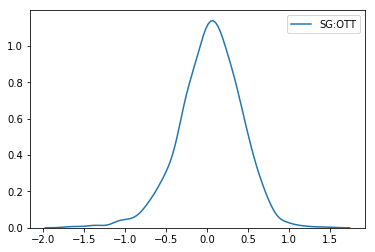

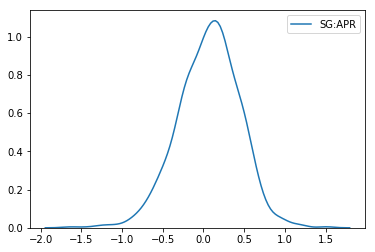

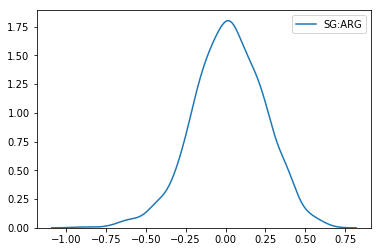

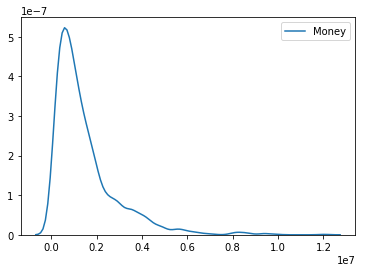

In [99]:
a=df4.select_dtypes(include=['int64', 'int32', 'float64']).columns

for i,j in enumerate(a):
    plt.figure(i)
    sns.kdeplot(df4[j])

- We can see that most of them are normally distributed excpet certain columns like
- Money has Left Skewed
- in Top 10 high variance is there
- Points has Left Skewed
- The data is not uniformly distributed, all the data are accumulated at one point.

### F. Find the number of players with &quot;Wins&quot; for each and every year. Convert the same to an integer. Replace Null values with 0 if present (2 marks)

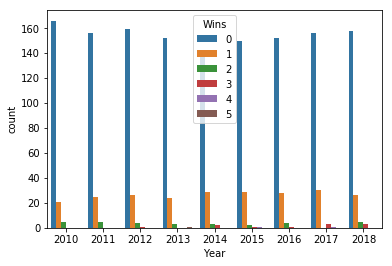

In [100]:
sns.countplot(df4['Year'],hue=df4['Wins'])

In [102]:
Victories = df4.groupby('Year')['Wins'].value_counts()
Victories = Victories.unstack()
Victories.fillna(0, inplace=True)
Victories = Victories.astype(int) 
Victories

Wins,0,1,2,3,4,5
Year,,,,,,
2010,166,21,5,0,0,0
2011,156,25,5,0,0,0
2012,159,26,4,1,0,0
2013,152,24,3,0,0,1
2014,142,29,3,2,0,0
2015,150,29,2,1,1,0
2016,152,28,4,1,0,0
2017,156,30,0,3,1,0
2018,158,26,5,3,0,0


## 8. Read the dataset(bollywood.csv) answer the questions below
### A. Is there any relationship between Genre and Release time? (5 Mark)


In [103]:
df5=pd.read_csv("C:/Users/Anand/Desktop/Yash/bollywood.csv")
df5.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-04-2014,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,04-01-2013,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-07-2014,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,04-01-2013,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,04-07-2014,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [104]:
df5["Genre"].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: Genre, dtype: int64

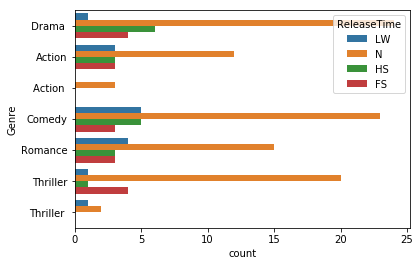

In [116]:
sns.countplot(y=df5["Genre"],hue=df5["ReleaseTime"])

In [112]:
df5["Genre"] = df5["Genre"].astype('category')
df5.dtypes
df5["Genre_Cat"] = df5["Genre"].cat.codes
df5.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Genre_Cat
0,1,18-04-2014,2 States,LW,Romance,36,104.00,8576361,26622,2527,4
1,2,04-01-2013,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,6
2,3,18-07-2014,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,3
3,4,04-01-2013,Rajdhani Express,N,Drama,7,0.35,42626,86,19,0
4,5,04-07-2014,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,3


In [113]:
df5["Genre_Cat"].value_counts()

3    36
0    35
5    26
4    25
1    21
6     3
2     3
Name: Genre_Cat, dtype: int64

In [114]:
df5.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Genre_Cat
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949,-0.000910
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343,-0.171205
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941,-0.173925
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739,-0.059440
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730,-0.179431
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000,-0.086260
Genre_Cat,-0.000910,-0.171205,-0.173925,-0.059440,-0.179431,-0.086260,1.000000


- negetive correlation between budget and genre 

### B. Which movie got the highest profit and which genre of movie has the highest budget? (5 Marks)


In [121]:
df5['profit'] = df5['BoxOfficeCollection']-df5['Budget']
df5.loc[df5['profit']==df5["profit"].max()]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Genre_Cat,profit
89,90,19-12-2014,PK,HS,Drama,85,735.0,13270623,43767,5693,0,650.0


In [111]:
df5.loc[df5['Budget']==df5["Budget"].max()]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
148,149,23-05-2014,Kochadaiiyaan,HS,Action,150,120.0,4740727,13466,2649


- PK has the highest profit 650 cr in drama genre and Kochadaiiyan has the highest budget in Action genre.

### C. Which year has the highest box office collection (5 Marks)

In [122]:
df5['ReleaseYear'] = df5['Release Date'].str[-4:]
df5.groupby('ReleaseYear')[['BoxOfficeCollection']].sum().reset_index().rename(columns={'BoxOfficeCollection':'TotalBoxOfficeCollection'})

,ReleaseYear,TotalBoxOfficeCollection
0,2013,3468.15
1,2014,4317.01
2,2015,509.26


- PK got highest profit in drama genre in year 2014